In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

df = pd.read_json(
    "C:\\Users\\rudra\\Desktop\\Student_Reccomendations\\Data\\Historical_data.json"
)
df.head(2)

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17 15:30:18.044000+05:30,2025-01-17 15:30:18.044000+05:30,108,2,90 %,100,...,2025-01-17 15:18:30+05:30,2025-01-17 15:30:15+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17 15:17:44.056000+05:30,2025-01-17 15:17:44.056000+05:30,92,1,100 %,100,...,2025-01-17 15:07:45+05:30,2025-01-17 15:17:41+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."


## Key Features To Consider

- **quiz_id**
- **score**
- **trophy level**
- **accuracy**
- **final_score**
- **duration**
- **better_than**
- **initial_mistake_count**
- **title**
- **topic**


In [2]:
df.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')

In [3]:
def topic(x):
    return str(x["topic"]).lower()


def title(x):
    return str(x["title"]).lower()

In [4]:
df["topic"] = df["quiz"].apply(topic)
df["title"] = df["quiz"].apply(title)

In [5]:
df = df[
    [
        "quiz_id",
        "score",
        "trophy_level",
        "accuracy",
        "final_score",
        "started_at",
        "ended_at",
        "duration",
        "better_than",
        "initial_mistake_count",
        "title",
        "topic",
    ]
]

In [6]:
def total_time(x):
    return (
        datetime.fromisoformat(str(x["ended_at"]))
        - datetime.fromisoformat(str(x["started_at"]))
    ).total_seconds() / 60

In [7]:
df["time_taken"] = df.apply(total_time, axis=1)
df = df.drop(["started_at", "ended_at"], axis=1)
df

,quiz_id,score,trophy_level,accuracy,final_score,duration,better_than,initial_mistake_count,title,topic,time_taken
0,51,108,2,90 %,105,15:00,107,12,human physiology (15),body fluids and circulation,11.750000
1,6,92,1,100 %,92,15:00,395,3,human physiology pyq,body fluids and circulation,9.933333
2,51,116,2,96 %,115,15:00,115,12,human physiology (15),body fluids and circulation,12.133333
3,6,36,2,90 %,35,15:00,152,2,human physiology pyq,body fluids and circulation,7.200000
4,51,36,3,31 %,16,15:00,35,20,human physiology (15),body fluids and circulation,13.216667
5,57,40,3,38 %,24,15:00,43,16,reproduction,human reproduction,10.100000
6,6,36,3,50 %,27,15:00,152,9,human physiology pyq,body fluids and circulation,13.050000
7,20,12,2,30 %,5,15:00,18,7,principles of inheritance and variation pyq,principles of inheritance and variation,4.583333
8,24,76,2,100 %,76,15:00,375,4,microbes in human welfare pyq,microbes in human welfare,13.900000
9,18,40,1,100 %,40,15:00,177,0,reproductive health pyq,reproductive health,1.433333


In [8]:
def accuracy(x):
    return int(x["accuracy"].split(" %")[0])


def duration(x):
    return int(x["duration"].split(":")[0])

In [9]:
df["accuracy"] = df.apply(accuracy, axis=1)
df["duration"] = df.apply(duration, axis=1)

In [10]:
df_new = df.groupby("quiz_id")
df_new.first()

,score,trophy_level,accuracy,final_score,duration,better_than,initial_mistake_count,title,topic,time_taken
quiz_id,,,,,,,,,,
6,92,1,100,92,15,395,3,human physiology pyq,body fluids and circulation,9.933333
18,40,1,100,40,15,177,0,reproductive health pyq,reproductive health,1.433333
20,12,2,30,5,15,18,7,principles of inheritance and variation pyq,principles of inheritance and variation,4.583333
24,76,2,100,76,15,375,4,microbes in human welfare pyq,microbes in human welfare,13.900000
25,112,2,93,110,15,270,14,human health and disease pyq,human health and disease,15.750000
50,24,3,66,21,15,23,3,human physiology (14),respiration and gas exchange,5.466667
51,108,2,90,105,15,107,12,human physiology (15),body fluids and circulation,11.750000
57,40,3,38,24,15,43,16,reproduction,human reproduction,10.100000
58,52,2,43,35,15,92,17,reproduction,reproductive health,16.383333


In [11]:
df_vis = df.groupby(["quiz_id"]).aggregate(
    avg_score=("score", "mean"),
    avg_accuracy=("accuracy", "mean"),
    avg_time=("time_taken", "mean"),
    avg_initial_mistake_count=("initial_mistake_count", "mean"),
)
df_vis

,avg_score,avg_accuracy,avg_time,avg_initial_mistake_count
quiz_id,,,,
6,54.666667,80.000000,10.061111,4.666667
18,52.000000,92.000000,3.508333,1.500000
20,12.000000,30.000000,4.583333,7.000000
24,76.000000,100.000000,13.900000,4.000000
25,112.000000,93.000000,15.750000,14.000000
50,24.000000,66.000000,5.466667,3.000000
51,86.666667,72.333333,12.366667,14.666667
57,40.000000,38.000000,10.100000,16.000000
58,52.000000,43.000000,16.383333,17.000000


C:\Users\rudra\AppData\Local\Temp\ipykernel_8780\3281256863.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_vis.index, y=df_vis["avg_score"], palette="viridis")


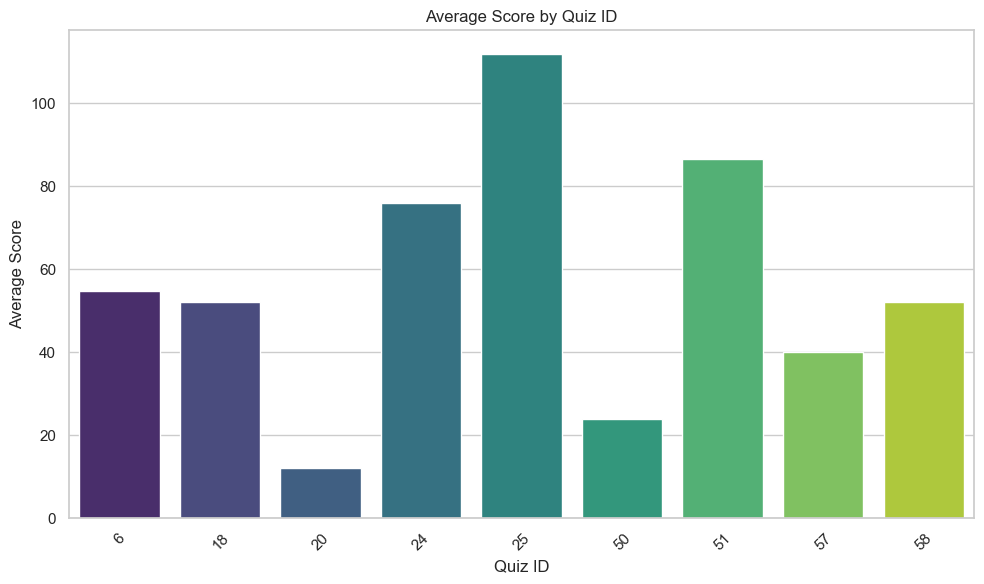

C:\Users\rudra\AppData\Local\Temp\ipykernel_8780\3281256863.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_vis.index, y=df_vis["avg_accuracy"], palette="muted")


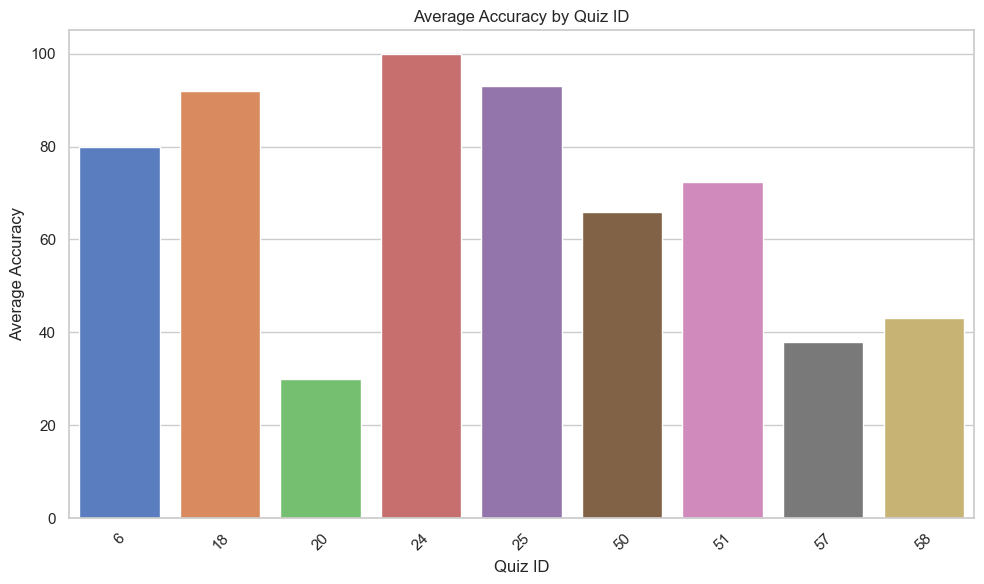

C:\Users\rudra\AppData\Local\Temp\ipykernel_8780\3281256863.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_vis.index, y=df_vis["avg_time"], palette="coolwarm")


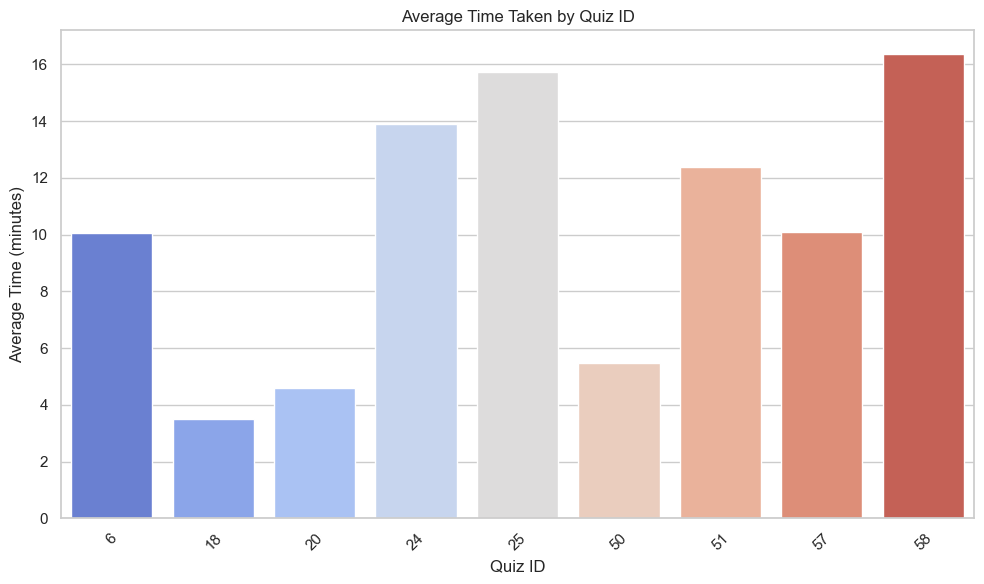

C:\Users\rudra\AppData\Local\Temp\ipykernel_8780\3281256863.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_vis.index, y=df_vis["avg_initial_mistake_count"], palette="pastel")


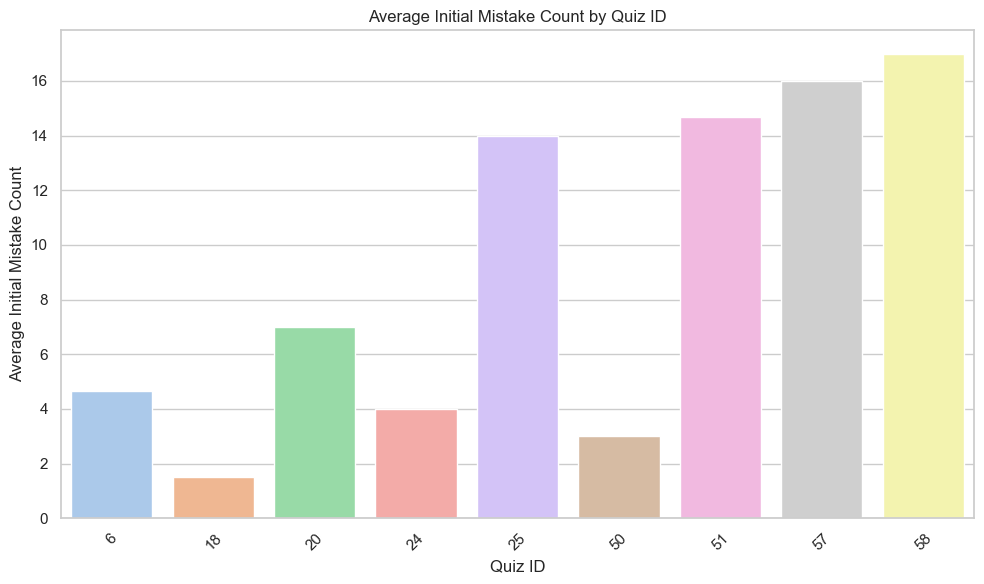

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot avg_score for different quiz_id
plt.figure(figsize=(10, 6))
sns.barplot(x=df_vis.index, y=df_vis["avg_score"], palette="viridis")
plt.title("Average Score by Quiz ID")
plt.xlabel("Quiz ID")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot avg_accuracy for different quiz_id
plt.figure(figsize=(10, 6))
sns.barplot(x=df_vis.index, y=df_vis["avg_accuracy"], palette="muted")
plt.title("Average Accuracy by Quiz ID")
plt.xlabel("Quiz ID")
plt.ylabel("Average Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot avg_time for different quiz_id
plt.figure(figsize=(10, 6))
sns.barplot(x=df_vis.index, y=df_vis["avg_time"], palette="coolwarm")
plt.title("Average Time Taken by Quiz ID")
plt.xlabel("Quiz ID")
plt.ylabel("Average Time (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot avg_initial_mistake_count for different quiz_id
plt.figure(figsize=(10, 6))
sns.barplot(x=df_vis.index, y=df_vis["avg_initial_mistake_count"], palette="pastel")
plt.title("Average Initial Mistake Count by Quiz ID")
plt.xlabel("Quiz ID")
plt.ylabel("Average Initial Mistake Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df["combined"] = (
    df["trophy_level"].astype(str)
    + " "
    + df["accuracy"].astype(str)
    + " "
    + df["final_score"].astype(str)
    + " "
    + df["duration"].astype(str)
    + " "
    + df["better_than"].astype(str)
    + " "
    + df["initial_mistake_count"].astype(str)
    + " "
    + df["title"].astype(str)
)

In [14]:
df.head(2)

,quiz_id,score,trophy_level,accuracy,final_score,duration,better_than,initial_mistake_count,title,topic,time_taken,combined
0,51,108,2,90,105,15,107,12,human physiology (15),body fluids and circulation,11.750000,2 90 105 15 107 12 human physiology (15)
1,6,92,1,100,92,15,395,3,human physiology pyq,body fluids and circulation,9.933333,1 100 92 15 395 3 human physiology pyq


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=40)
vectors = cv.fit_transform(df["combined"]).toarray()

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors)

In [17]:
similarity[0]

array([1.        , 0.47809144, 0.66742381, 0.5976143 , 0.6       ,
       0.25819889, 0.51639778, 0.28284271, 0.38729833, 0.23904572,
       0.3354102 , 0.25819889, 0.25819889, 0.47809144])

In [18]:
def recommend(title, score):
    idx = df[(df["title"] == title) & (df["score"] == score)].index[0]
    ans = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])[
        1:3
    ]
    results = set()
    for row in ans:
        results.add(df["topic"][row[0]].strip())
    return results


print(recommend("human physiology (15)", 108))

{'body fluids and circulation'}


In [19]:
import pickle 

with open("model.pkl",'wb') as f:
    pickle.dump(similarity,f)